In [1]:
using Pkg; Pkg.activate(".")

  Activating project at `~/Documents/Courses/CSE8803/Project`


In [2]:
using DataFrames, CSV, Plots, ColorSchemes

In [3]:
cgcnn_res = CSV.read("cgcnn.txt", DataFrame, delim = " ", header = ["rc", "gc", "dim1", "dim2", "lr", "test_mae", "val_mae"])
dagnn_res = CSV.read("dagnn.txt", DataFrame, delim = " ", header = ["rc", "gc", "dim1", "dim2", "lr", "test_mae", "val_mae"]);
shadowgnn_res = CSV.read("shadowgnn.txt", DataFrame, delim = " ", header = ["rc", "gc", "dim1", "dim2", "lr", "test_mae", "val_mae"]);

In [4]:
new_df = []
for rc in [2.0, 4.0, 8.0]
    for gc in [4, 8, 16, 32]
        filtered_data = filter(x -> x[1] == rc && x[2] == gc, cgcnn_res)
        argmin_val = argmin(filtered_data[!, "val_mae"])
        row_to_keep = filtered_data[argmin_val, :]
        push!(new_df, row_to_keep)
    end
end
new_df_c = DataFrame(new_df)

Row,rc,gc,dim1,dim2,lr,test_mae,val_mae
,Float64,Int64,Int64,Int64,Float64,Float64,Float64
1,2.0,4,64,32,0.001,0.149467,0.125468
2,2.0,8,64,32,0.002,0.146839,0.128206
3,2.0,16,32,16,0.002,0.152434,0.128349
4,2.0,32,64,32,0.001,0.154615,0.13247
5,4.0,4,64,32,0.002,0.134259,0.118429
6,4.0,8,128,16,0.002,0.13199,0.117931
7,4.0,16,128,32,0.001,0.131946,0.119027
8,4.0,32,64,32,0.001,0.137366,0.120656
9,8.0,4,64,16,0.002,0.147217,0.128144


In [5]:
new_df = []
for rc in [2.0, 4.0, 8.0]
    for gc in [4, 8, 16, 32]
        filtered_data = filter(x -> x[1] == rc && x[2] == gc, dagnn_res)
        argmin_val = argmin(filtered_data[!, "val_mae"])
        row_to_keep = filtered_data[argmin_val, :]
        push!(new_df, row_to_keep)
    end
end
new_df_d = DataFrame(new_df)

Row,rc,gc,dim1,dim2,lr,test_mae,val_mae
,Float64,Int64,Int64,Int64,Float64,Float64,Float64
1,2.0,4,64,32,0.002,0.16526,0.149249
2,2.0,8,128,32,0.001,0.166342,0.148169
3,2.0,16,64,16,0.002,0.16856,0.148091
4,2.0,32,128,32,0.001,0.165964,0.148694
5,4.0,4,32,16,0.002,0.162557,0.151434
6,4.0,8,64,32,0.002,0.166016,0.15139
7,4.0,16,32,16,0.002,0.165363,0.150196
8,4.0,32,64,16,0.002,0.165999,0.152501
9,8.0,4,64,32,0.002,0.168491,0.15033


In [6]:
new_df = []
for rc in [4.0, 8.0]
    for gc in [4, 8, 16, 32]
        filtered_data = filter(x -> x[1] == rc && x[2] == gc, shadowgnn_res)
        argmin_val = argmin(filtered_data[!, "val_mae"])
        row_to_keep = filtered_data[argmin_val, :]
        push!(new_df, row_to_keep)
    end
end
new_df_s = DataFrame(new_df)

Row,rc,gc,dim1,dim2,lr,test_mae,val_mae
,Float64,Int64,Int64,Int64,Float64,Float64,Float64
1,4.0,4,128,16,0.001,0.139825,0.120792
2,4.0,8,128,32,0.002,0.138619,0.119341
3,4.0,16,128,16,0.001,0.1353,0.118625
4,4.0,32,32,16,0.001,0.147556,0.117615
5,8.0,4,128,32,0.002,0.141586,0.12202
6,8.0,8,128,32,0.002,0.138997,0.119664
7,8.0,16,32,16,0.001,0.135429,0.117605
8,8.0,32,128,32,0.002,0.139961,0.117725


In [11]:
get.(Ref(ColorSchemes.algae), new_df_c[!, "rc"] ./ 12)

In [12]:
get.(Ref(ColorSchemes.amp), new_df_d[!, "rc"] ./ 12)

In [13]:
get.(Ref(ColorSchemes.ice), new_df_s[!, "rc"] ./ 12)

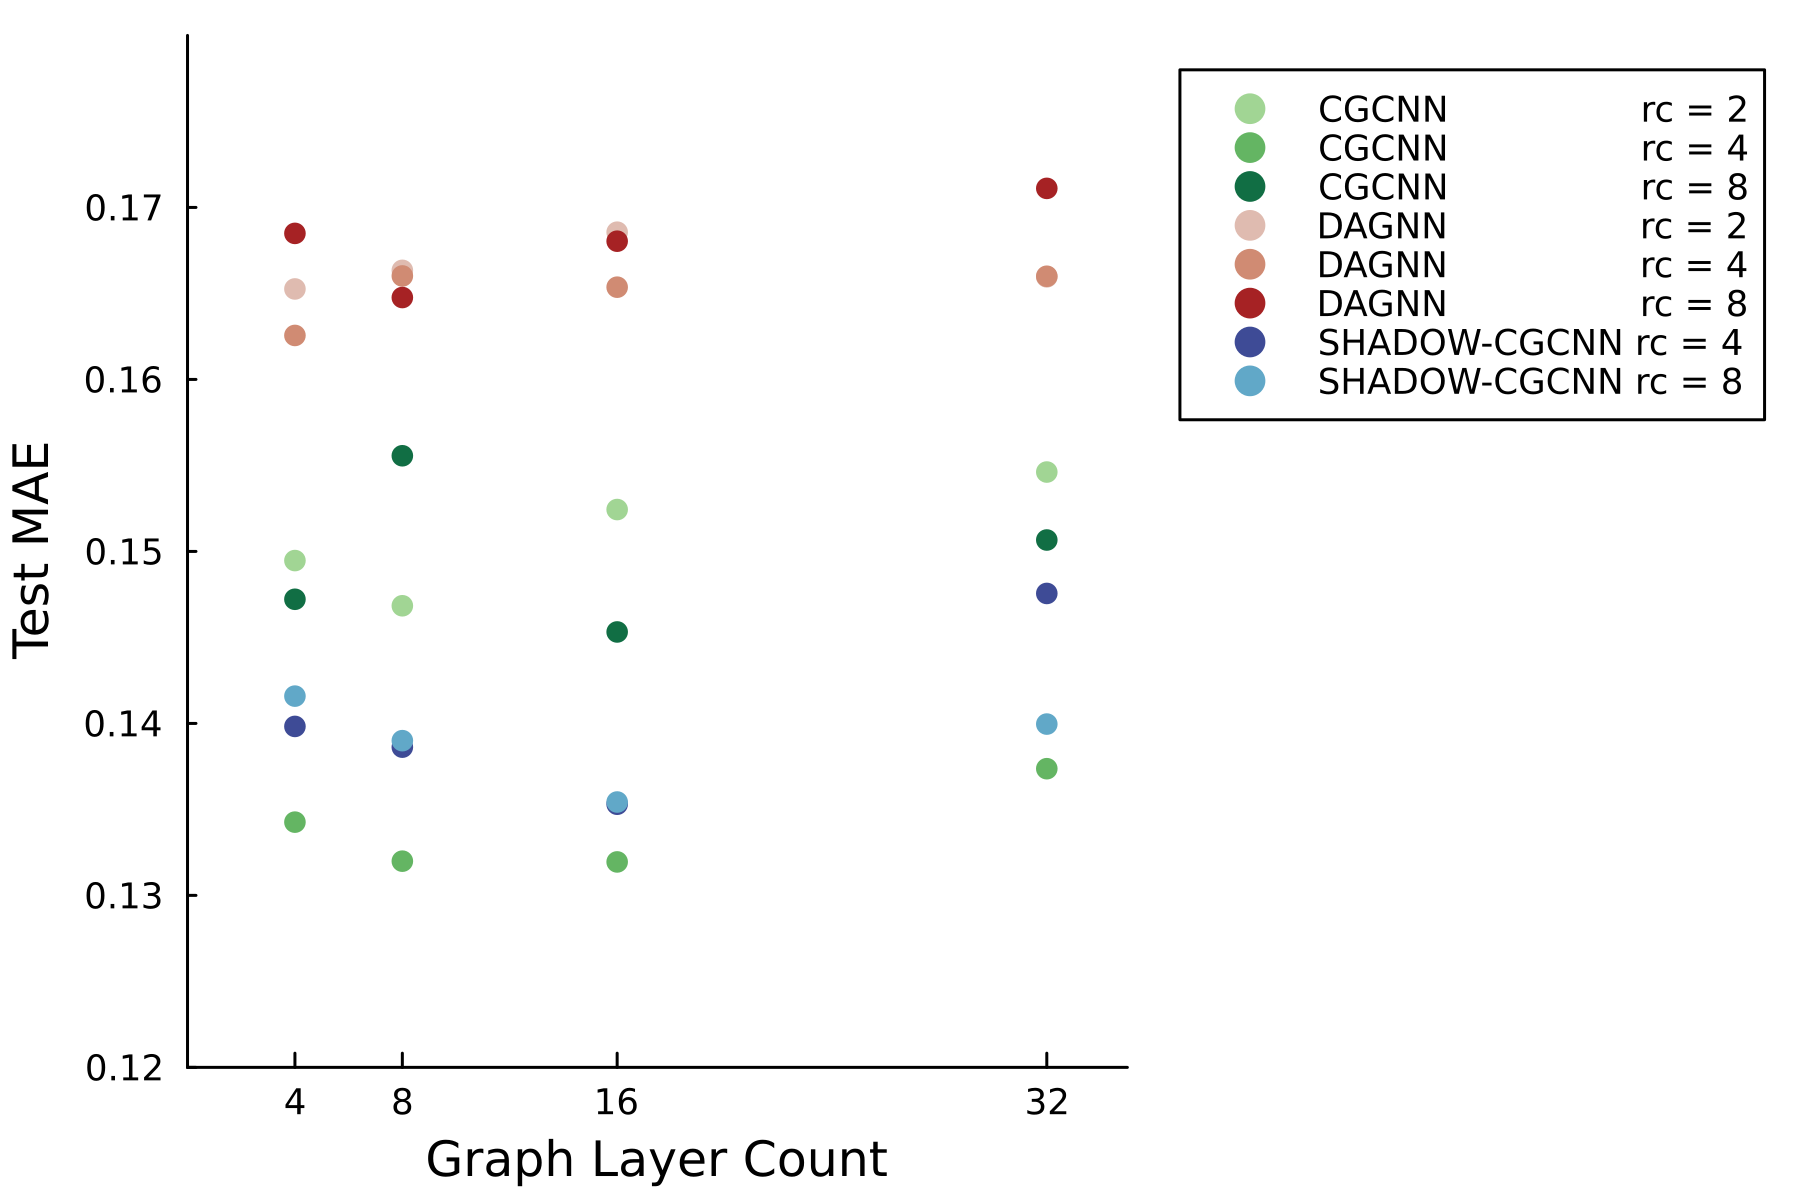

In [29]:
plot(grid = false, ylabel = "Test MAE", xlabel = "Graph Layer Count", ylims = (0.12, 0.18), xlims = (0, 35), xticks = [4, 8, 16, 32], 
    legend =  :outertopright, dpi = 300)
scatter!(new_df_c[!, "gc"], new_df_c[!, "test_mae"], label = "", 
    color = get.(Ref(ColorSchemes.algae), new_df_c[!, "rc"] ./ 12), markerstrokecolor = get.(Ref(ColorSchemes.algae), new_df_c[!, "rc"] ./ 12))
scatter!(new_df_d[!, "gc"], new_df_d[!, "test_mae"], label = "", 
    color = get.(Ref(ColorSchemes.amp), new_df_d[!, "rc"] ./ 12), markerstrokecolor = get.(Ref(ColorSchemes.amp), new_df_d[!, "rc"] ./ 12))
scatter!(new_df_s[!, "gc"], new_df_s[!, "test_mae"], label = "", 
    color = get.(Ref(ColorSchemes.ice), new_df_s[!, "rc"] ./ 12), markerstrokecolor = get.(Ref(ColorSchemes.ice), new_df_s[!, "rc"] ./ 12))
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.algae), 2 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.algae), 2 ./ 12), label = "CGCNN                 rc = 2")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.algae), 4 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.algae), 4 ./ 12), label = "CGCNN                 rc = 4")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.algae), 8 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.algae), 8 ./ 12), label = "CGCNN                 rc = 8")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.amp), 2 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.amp), 2 ./ 12), label = "DAGNN                 rc = 2")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.amp), 4 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.amp), 4 ./ 12), label = "DAGNN                 rc = 4")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.amp), 8 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.amp), 8 ./ 12), label = "DAGNN                 rc = 8")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.ice), 4 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.ice), 4 ./ 12), label = "SHADOW-CGCNN rc = 4")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.ice), 8 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.ice), 8 ./ 12), label = "SHADOW-CGCNN rc = 8")
savefig("MAE_Plot.png")
plot!()

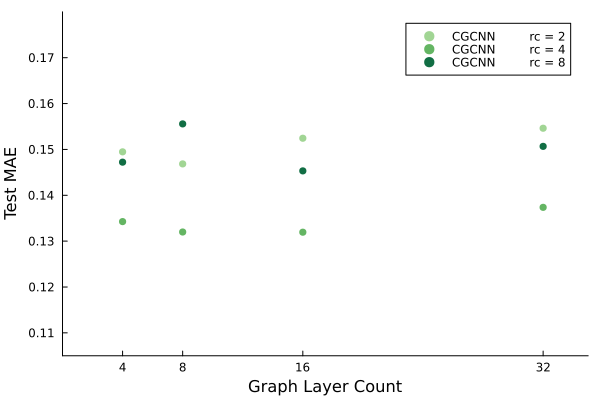

In [69]:
plot(grid = false, ylabel = "Test MAE", xlabel = "Graph Layer Count", ylims = (0.105, 0.18), xlims = (0, 35), xticks = [4, 8, 16, 32])
scatter!(new_df_c[!, "gc"], new_df_c[!, "test_mae"], label = "", 
    color = get.(Ref(ColorSchemes.algae), new_df_c[!, "rc"] ./ 12), markerstrokecolor = get.(Ref(ColorSchemes.algae), new_df_c[!, "rc"] ./ 12))
#scatter!(new_df_d[!, "gc"], new_df_d[!, "test_mae"], label = "", 
#    color = get.(Ref(ColorSchemes.amp), new_df_d[!, "rc"] ./ 12), markerstrokecolor = get.(Ref(ColorSchemes.amp), new_df_d[!, "rc"] ./ 12))
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.algae), 2 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.algae), 2 ./ 12), label = "CGCNN         rc = 2")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.algae), 4 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.algae), 4 ./ 12), label = "CGCNN         rc = 4")
scatter!([-1], [-1], color = get.(Ref(ColorSchemes.algae), 8 ./ 12), 
    markerstrokecolor = get.(Ref(ColorSchemes.algae), 8 ./ 12), label = "CGCNN         rc = 8")
#scatter!([-1], [-1], color = get.(Ref(ColorSchemes.amp), 2 ./ 12), 
#    markerstrokecolor = get.(Ref(ColorSchemes.amp), 2 ./ 12), label = "DAGNN         rc = 2")
#scatter!([-1], [-1], color = get.(Ref(ColorSchemes.amp), 4 ./ 12), 
#    markerstrokecolor = get.(Ref(ColorSchemes.amp), 4 ./ 12), label = "DAGNN         rc = 4")
#scatter!([-1], [-1], color = get.(Ref(ColorSchemes.amp), 8 ./ 12), 
#    markerstrokecolor = get.(Ref(ColorSchemes.amp), 8 ./ 12), label = "DAGNN         rc = 8")
#scatter!(new_df_s[!, "gc"], new_df_s[!, "test_mae"], label = "ShadowGNN rc = 4", color = palette(:default)[1], markerstrokecolor = palette(:default)[1])